# Existence of spherical photon orbits in Kerr spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

In [1]:
version()

'SageMath version 9.3.beta2, Release Date: 2020-11-24'

In [2]:
%display latex

## Functions $\ell(r_0)$ and $q(r_0)$

We use $m=1$ and denote $r_0$ simply by $r$.

In [3]:
a, r = var('a r') 

In [4]:
l(a, r) = (r^2*(3 - r) - a^2*(r + 1))/(a*(r -1))
l

(a, r) |--> -(a^2*(r + 1) + (r - 3)*r^2)/(a*(r - 1))

In [5]:
q(a, r) = r^3 / (a^2*(r - 1)^2) * (4*a^2 - r*(r - 3)^2)
q

(a, r) |--> -((r - 3)^2*r - 4*a^2)*r^3/(a^2*(r - 1)^2)

The radii of the two horizons:

In [6]:
rp(a) = 1 + sqrt(1 - a^2)
rm(a) = 1 - sqrt(1 - a^2)

## Critical radii $r_{\rm ph}^{**}$, $r_{\rm ph}^*$, $r_{\rm ph}^+$ and $r_{\rm ph}^-$ 

In [7]:
rph_ss(a) = 1/2 + cos(2/3*asin(a) + 2*pi/3)
rph_ss

a |--> cos(2/3*pi + 2/3*arcsin(a)) + 1/2

In [8]:
rph_s(a) = 4*cos(acos(-a)/3 + 4*pi/3)^2
rph_s

a |--> 4*cos(4/3*pi + 1/3*arccos(-a))^2

In [9]:
rph_p(a) = 4*cos(acos(-a)/3)^2
rph_p

a |--> 4*cos(1/3*arccos(-a))^2

In [10]:
rph_m(a) = 4*cos(acos(a)/3)^2
rph_m

a |--> 4*cos(1/3*arccos(a))^2

## Plots for $a=0.95 \, m$

In [11]:
a0 = 0.95

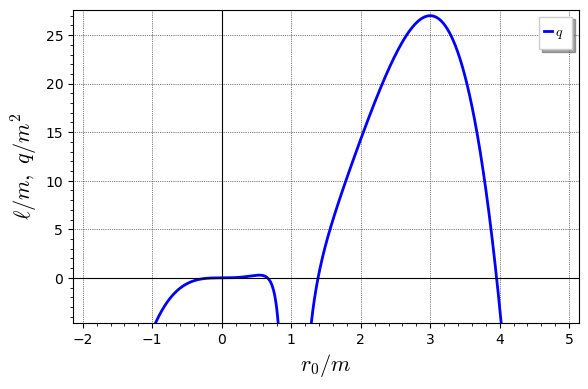

In [12]:
gq = plot(q(a0, r), (r, -2, 0.9), thickness=2, legend_label=r'$q$', 
          axes_labels=[r'$r_0/m$', r'$\ell/m,\ q/m^2$'],
          frame=True, gridlines=True) \
     + plot(q(a0, r), (r, 1.1, 5), thickness=2)
show(gq, ymin=-4)

In [13]:
gl = plot(l(a0, r), (r, -2, 0.99), color='red', thickness=2, legend_label=r'$\ell$') \
     + plot(l(a0, r), (r, 1.002, 5), color='red', thickness=2)

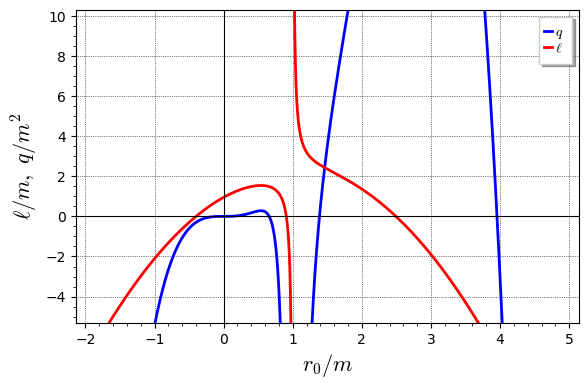

In [14]:
show(gq+gl, ymin=-5, ymax=10)

In [15]:
def qmin(a1, r):
    l0 = abs(l(a1, r))
    if l0 < a1:
        return -(a1 - l0)^2
    return 0

In [16]:
gqmin = plot(lambda r: qmin(a0, r), (r, -2, 5), color='grey', thickness=2, fill=-8)

In [17]:
hor = line([(rp(a0), -10), (rp(a0), 30)], color='black', thickness=2) \
      + line([(rm(a0), -10), (rm(a0), 30)], color='peru', thickness=2)
llim = line([(-2, a0), (5, a0)], color='red', thickness=1.5, 
            linestyle=':', legend_label=r'$|\ell| = a$') \
       + line([(-2, -a0), (5, -a0)], color='red', thickness=1.5, 
              linestyle=':')

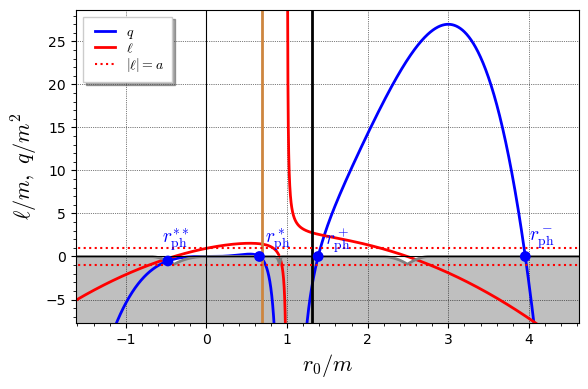

In [18]:
graph = gq + gl + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point([(r1, q(a0, r1))], size=60, color='blue', zorder=100)
graph += text(r'$r_{\rm ph}^{**}$', (rph_ss(a0) + 0.1, 2), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^*$', (rph_s(a0) + 0.23, 2), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^+$', (rph_p(a0) + 0.25, 2), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^-$', (rph_m(a0) + 0.2, 2), fontsize=14, zorder=101)
graph.set_legend_options(handlelength=2)
show(graph, xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)
graph.save('gik_spher_orb_exist.pdf', xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)

Zoom:

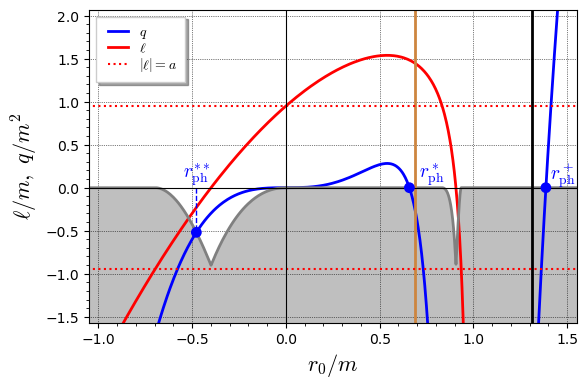

In [19]:
graph = gq + gl + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point([(r1, q(a0, r1))], size=60, color='blue', zorder=100)
graph += text(r'$r_{\rm ph}^{**}$', (rph_ss(a0), 0.15), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^*$', (rph_s(a0) + 0.12, 0.15), fontsize=14, zorder=101)
graph += text(r'$r_{\rm ph}^+$', (rph_p(a0) + 0.09, 0.15), fontsize=14, zorder=101)
r1 = rph_ss(a0)
graph += line([(r1, 0), (r1, q(a0, r1))], linestyle='--', color='blue')
graph.set_legend_options(handlelength=2)
show(graph, xmin=-1, xmax=1.5, ymin=-1.5, ymax=2)
graph.save('gik_spher_orb_exist_zoom.pdf', xmin=-1, xmax=1.5, ymin=-1.5, ymax=2)

## Plots for $a=0.5 \, m$

In [20]:
a0 = 0.5

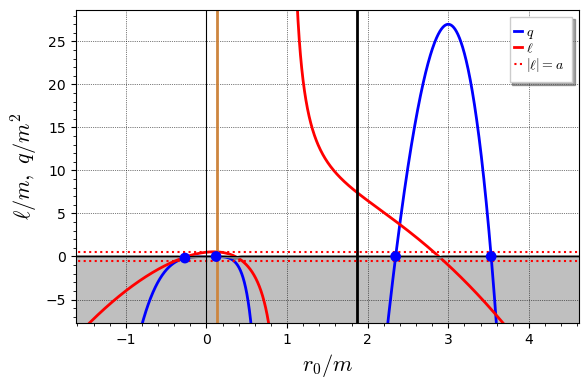

In [21]:
gq = plot(q(a0, r), (r, -2, 0.9), thickness=2, legend_label=r'$q$', 
          axes_labels=[r'$r_0/m$', r'$\ell/m,\ q/m^2$'],
          frame=True, gridlines=True) \
     + plot(q(a0, r), (r, 1.1, 5), thickness=2)
gl = plot(l(a0, r), (r, -2, 0.99), color='red', thickness=2, legend_label=r'$\ell$') \
     + plot(l(a0, r), (r, 1.002, 5), color='red', thickness=2)
gqmin = plot(lambda r: qmin(a0, r), (r, -2, 5), color='grey', thickness=2, fill=-8)
hor = line([(rp(a0), -10), (rp(a0), 30)], color='black', thickness=2) \
      + line([(rm(a0), -10), (rm(a0), 30)], color='peru', thickness=2)
llim = line([(-2, a0), (5, a0)], color='red', thickness=1.5, 
            linestyle=':', legend_label=r'$|\ell| = a$') \
       + line([(-2, -a0), (5, -a0)], color='red', thickness=1.5, 
              linestyle=':')
graph = gq + gl + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point([(r1, q(a0, r1))], size=60, color='blue', zorder=100)
show(graph, xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)

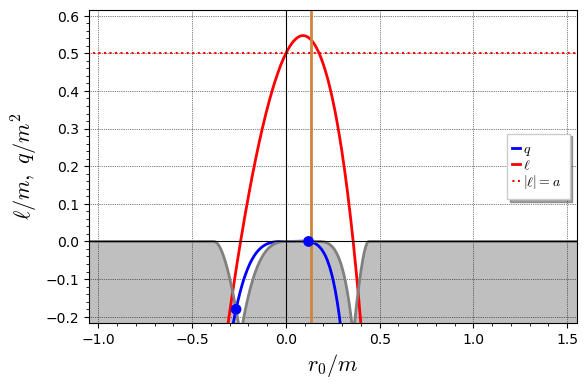

In [22]:
show(graph, xmin=-1, xmax=1.5, ymin=-0.2, ymax=0.6)

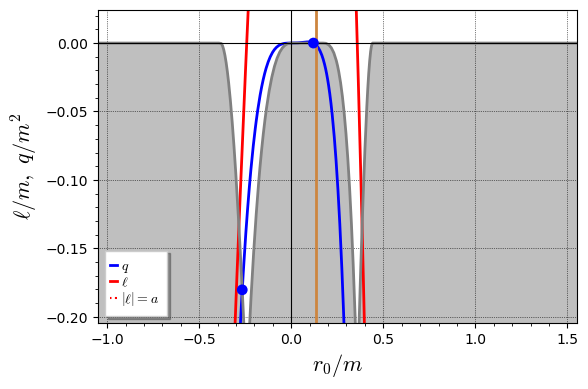

In [23]:
show(graph, xmin=-1, xmax=1.5, ymin=-0.2, ymax=0.02)

## Plots for $a=0.998\, m$

In [24]:
a0 = 0.998

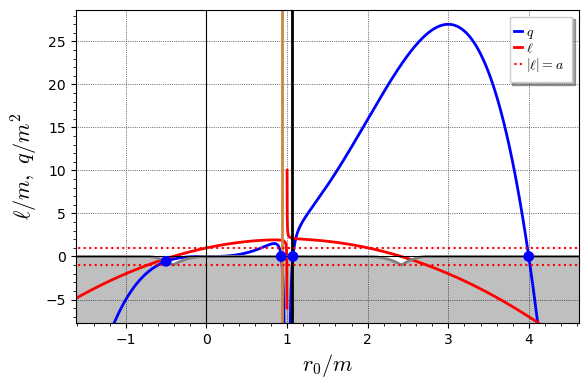

In [25]:
gq = plot(q(a0, r), (r, -2, 0.999), thickness=2, legend_label=r'$q$', 
          axes_labels=[r'$r_0/m$', r'$\ell/m,\ q/m^2$'],
          frame=True, gridlines=True) \
     + plot(q(a0, r), (r, 1.001, 5), thickness=2)
gl = plot(l(a0, r), (r, -2, 0.999), color='red', thickness=2, legend_label=r'$\ell$') \
     + plot(l(a0, r), (r, 1.001, 5), color='red', thickness=2)
gqmin = plot(lambda r: qmin(a0, r), (r, -2, 5), color='grey', thickness=2, fill=-8)
hor = line([(rp(a0), -10), (rp(a0), 30)], color='black', thickness=2) \
      + line([(rm(a0), -10), (rm(a0), 30)], color='peru', thickness=2)
llim = line([(-2, a0), (5, a0)], color='red', thickness=1.5, 
            linestyle=':', legend_label=r'$|\ell| = a$') \
       + line([(-2, -a0), (5, -a0)], color='red', thickness=1.5, 
              linestyle=':')
graph = gq + gl + gqmin + hor + llim
for r1 in [rph_ss(a0), rph_s(a0), rph_p(a0), rph_m(a0)]:
    graph += point([(r1, q(a0, r1))], size=60, color='blue', zorder=100)
show(graph, xmin=-1.5, xmax=4.5, ymin=-7, ymax=28)

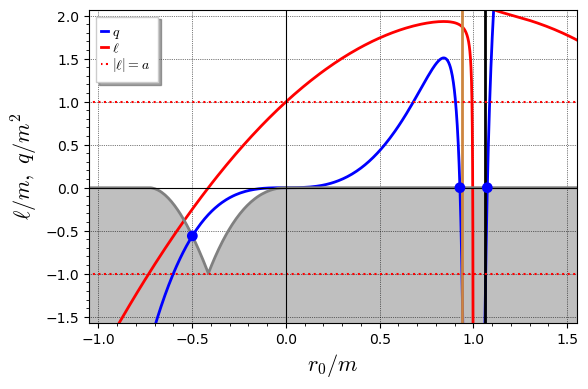

In [26]:
show(graph, xmin=-1, xmax=1.5, ymin=-1.5, ymax=2)

## Computation of $\frac{\mathrm{d}q}{\mathrm{d}r_0}$

In [27]:
diff(q(a, r), r).simplify_full().factor()

-4*(r^3 - a^2 - 3*r^2 + 3*r)*(r - 3)*r^2/(a^2*(r - 1)^3)

## Solutions of the cubic equation $2 r^3 - 3 m r^2 + a^2 m = 0$

In [28]:
P = 2*r^3 - 3*r^2 + a^2 
P

2*r^3 + a^2 - 3*r^2

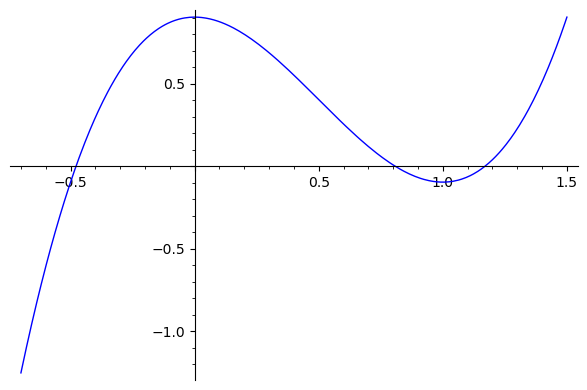

In [29]:
a0 = 0.95
plot(P.subs({a: a0}), (r, -0.7, 1.5))

In [30]:
Pdep = (P/2).subs({r: x + 1/2}).simplify_full()
Pdep

x^3 + 1/2*a^2 - 3/4*x - 1/4

In [31]:
p = -3/4
q = 1/2*(a^2 - 1/2)

In [32]:
sqrt(-p/3)

1/2

In [33]:
3*q/(2*p)

-a^2 + 1/2

In [34]:
3*q/(2*p)*sqrt(-3/p)

-2*a^2 + 1

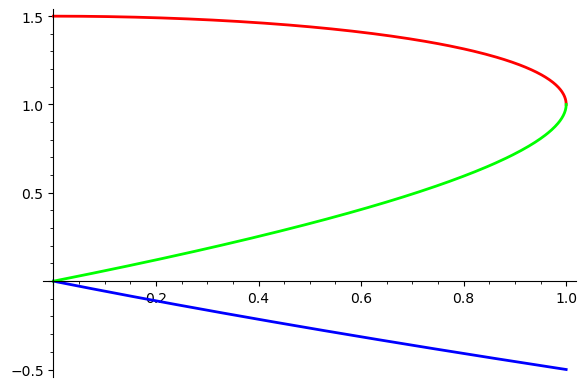

In [35]:
g = Graphics()
for k in range(3):
    rk = 1/2 + cos(2/3*asin(a) + 2*k*pi/3)
    g += plot(rk, (a, 0, 1), color=hue((3-k)/3), thickness=2)
g

Checking that $x_1 = \cos\left(\frac{2}{3}\arcsin(a) + \frac{2\pi}{3}\right)$ is a solution:

In [36]:
s = Pdep.subs({x: cos(2/3*asin(a) + 2*pi/3)}) 
s

cos(2/3*pi + 2/3*arcsin(a))^3 + 1/2*a^2 - 3/4*cos(2/3*pi + 2/3*arcsin(a)) - 1/4

In [37]:
s.expand_trig().simplify_trig().reduce_trig().expand_trig()

0

## Plot of the critical radii as functions of $a$

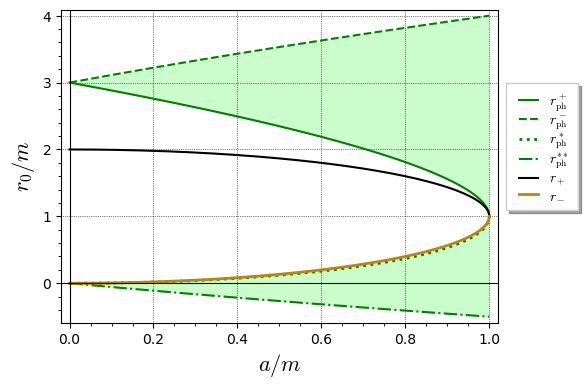

In [38]:
graph = plot(rph_p, (0, 1), axes_labels=[r'$a/m$', r'$r_0/m$'], 
             color='green', thickness=1.5, legend_label=r'$r_{\rm ph}^+$', 
             fill=rph_m, fillcolor='palegreen',
             frame=True, gridlines=True, axes=True) \
+ plot(rph_m, (0, 1), linestyle='--', color='green', thickness=1.5, 
       legend_label=r'$r_{\rm ph}^-$') \
+ plot(rph_s, (0, 1), color='green', linestyle=':', thickness=2, 
       legend_label=r'$r_{\rm ph}^*$', fill=rph_ss, fillcolor='palegreen') \
+ plot(rph_ss, (0, 1), color='green', linestyle='-.', thickness=1.5, 
       legend_label=r'$r_{\rm ph}^{**}$') \
+ plot(rp, (0, 1), color='black', thickness=1.5, legend_label=r'$r_+$') \
+ plot(rm, (0, 1), color='darkgoldenrod', thickness=2, legend_label=r'$r_-$') 
graph.set_legend_options(handlelength=2, loc=(1.02, 0.36))
show(graph)
graph.save('gik_spher_orb_range.pdf')